# Group 30  Content Analysis using Pictures assignment


In this script we are analysing the X-ray images of the patients who were infected by Covid-19 and those not infected so that we can see the parttens and able to detect if the participant is / was infected by covid-19

Date:   21 /09 /2022

In [7]:
#imports
import numpy as np
import tensorflow as tf
import glob
import cv2
import random
import matplotlib.pylab as plt
import pandas as pd
import sys as system
from mlxtend.preprocessing import one_hot
from sklearn import preprocessing



In [21]:
import os
train_dir = 'C:/Users/USER/Documents/MASTERS IN DATA ANALYTICS/machine learning/PANASHE/Assignment/X-Ray Image dataset/dataset/Train_Dataset'
validation_dir ='C:/Users/USER/Documents/MASTERS IN DATA ANALYTICS/machine learning/PANASHE/Assignment/X-Ray Image dataset/dataset/Validation_Dataset'
train_normal_dir = os.path.join(train_dir, 'No_Covid-19')
train_covid_dir = os.path.join(train_dir, 'Covid-19')
train_pneu_dir = os.path.join(train_dir, 'Pneumonia')
validation_normal_dir = os.path.join(validation_dir, 'val_NoCovid')
validation_covid_dir = os.path.join(validation_dir, 'Val_covid')
validation_pneu_dir = os.path.join(validation_dir, 'val_pneumonia')

### Exploratory Data Analysis of the Chest X-ray images

In [22]:
train_normal_fnames = os.listdir(train_normal_dir)
print(train_normal_fnames[:10])

train_covid_fnames = os.listdir(train_covid_dir)
train_covid_fnames.sort()
print(train_covid_fnames[:10])

train_pneu_fnames = os.listdir(train_pneu_dir)
train_pneu_fnames.sort()
print(train_pneu_fnames[:10])

['00001280_004.png', '00001281_000.png', '00001299_000.png', '00001300_000.png', '00001303_001.png', '00001304_001.png', '00001305_001.png', '00001308_002.png', '00001315_006.png', '00001323_001.png']
['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '1-s2.0-S0929664620300449-gr2_lrg-b.jpg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg', '1-s2.0-S0929664620300449-gr2_lrg-d.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png']
['00000061_012.png', '00000061_015.png', '00000150_002.png', '00000165_001.png', '00000193_019.png', '00000211_013.png', '00000211_018.png', '00000218_000.png', '00000218_001.png', '00000261_002.png']


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 6
ncols = 4
pic_index = 0

#### Lets print out the images 

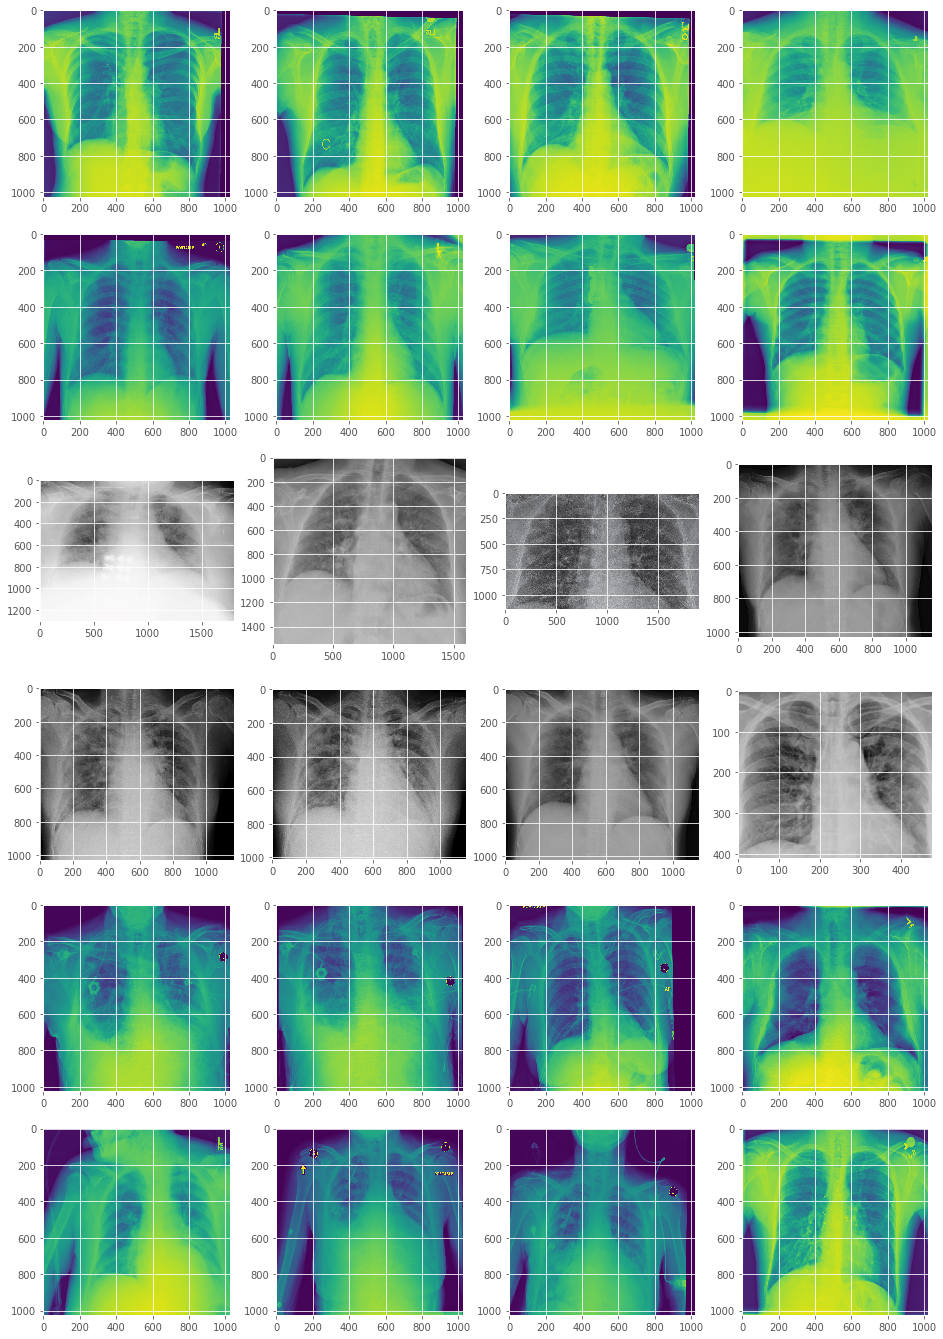

shape of the original image is (1024, 1024)


In [24]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[pic_index-8:pic_index]]
next_covid_pix = [os.path.join(train_covid_dir, fname) 
                for fname in train_covid_fnames[pic_index-8:pic_index]]
next_pneu_pix = [os.path.join(train_pneu_dir, fname) 
                for fname in train_pneu_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_covid_pix+next_pneu_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

#lets see the shape of the image 
print (f'shape of the original image is {img.shape}')

### BUILDING OF CNN ARCHITECTURE

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

After building this CNN Architecture it doesnt yield desired results thats why we try TRANSFER LEARNING

In [26]:
# # First convolution extracts 16 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# #x = layers.Conv2D(16, 3, activation='relu')(img_input)
# x = layers.Conv2D(16, 3, activation='relu')(img_input)
# #x = layers.MaxPooling2D(2)(x)
# x=AveragePooling2D(pool_size=(4, 4))(x)

# # Second convolution extracts 32 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# x = layers.Conv2D(32, 3, activation='relu')(x)
# #x = layers.MaxPooling2D(2)(x)
# x=AveragePooling2D(pool_size=(4, 4))(x)

# # Second convolution extracts 32 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# x = layers.Conv2D(32, 3, activation='relu')(x)
# #x = layers.MaxPooling2D(2)(x)
# x=AveragePooling2D(pool_size=(4, 4))(x)

# # Second convolution extracts 32 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# x = layers.Conv2D(32, 3, activation='relu')(x)
# #x = layers.MaxPooling2D(2)(x)
# x=AveragePooling2D(pool_size=(4, 4))(x)

# # Third convolution extracts 64 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

# # Third convolution extracts 64 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

# # Third convolution extracts 64 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

# # Third convolution extracts 64 filters that are 3x3
# # Convolution is followed by max-pooling layer with a 2x2 window
# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

### TRANSFER LEARNING 

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters. ^1

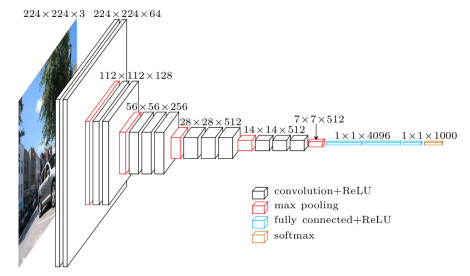



In [27]:
# Our input feature map is 224x224x3: 224x224 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(224, 224,3))

# load model and specify a new input shape for images

baseModel = VGG16(weights="imagenet",include_top=False, input_tensor=img_input, pooling='avg')

x=baseModel.output
#x = Sequential()

#### HYPER PARAMETER TUNING <br>
<ul>
 <li> We construct the convolution layers and poolong layers but it didnt yeild any good results 
    <li> We also tried between MaxPooling and Average pooling - the Average pooling performs better 
        <li>  we also train the model without using Drop out on the hidden layer - adding dropout yeilds in better results x = Dropout(0.5)(x)
            <li> Since we have 3 classes the binary_crossentropy doesnt work so we use Softmax
                <li>  We also tried  #steps_per_epoch=900//BS,  and  #validation_steps=225//BS,  but the model was complaining of running short of training data 
                    </ul>

In [28]:
#### Adding Fully connected layer ontop of VGG16

In [29]:


# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten(name="flatten")(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# # Create a fully connected layer with ReLU activation and 64 hidden units
x = layers.Dense(64, activation='relu')(x)

# # Create a fully connected layer with ReLU activation and 32 hidden units
x = layers.Dense(32, activation='relu')(x)

# # Create output layer with a single node and sigmoid activation
# #output = layers.Dense(1, activation='sigmoid')(x)
x = Dropout(0.5)(x)
output = layers.Dense(3, activation='softmax')(x)


# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

#model = Model(inputs=img_input, outputs=output)

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [31]:
### CNN PARAMETRES

In [32]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['acc'])

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 17
BS = 10


# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,       # categorical_crossentropy/ sparse_categorical_crossentropy for integer targets
	metrics=["accuracy"])

[INFO] compiling model...


#### IMAGE  DATA AUGMENTATION

The objective of ImageDataGenerator is to import data with labels easily into the model.

Here I am creating and object of ImageDataGenerator for both training and testing data and passing the folder which has train data **(train_dir)**  to the object **train_datagen** and similarly passing the folder which has test data **(validation_dir)** to the object **val_datagen**. The folder structure of the data will be as follows -

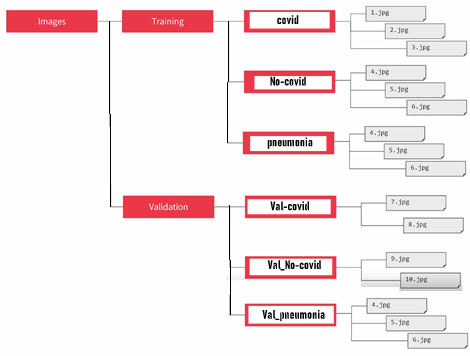

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 - training data augmentation
train_datagen = ImageDataGenerator(rescale=1./255 , fill_mode="nearest",rotation_range=15)
val_datagen = ImageDataGenerator(rescale=1./255, fill_mode="nearest", rotation_range=15 )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        #class_mode='binary')
        class_mode='categorical',
        shuffle=True,
        seed=42)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=10,
        #class_mode='binary')
        class_mode='categorical',
        shuffle=False,
        seed=42)



Found 1125 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [34]:
# Lets check the output of our data augmentation and how it classify our data set
print (train_generator.classes)
print (f'These are the classes of our images {train_generator.class_indices}')


[0 0 0 ... 2 2 2]
These are the classes of our images {'Covid-19': 0, 'No_Covid-19': 1, 'Pneumonia': 2}


### MODEL CHECKPOINTING AND EARLY STOPPING

We opted to save the model monitoring the Accuracy  (acc) rather than the Val_ Acc so that we get the best accurate model
<br> Since we use the Monitor ='acc'  we decided to use the mode ='max' as compared to mode='auto'

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("CovidModelBest.h5",
                             monitor='acc',
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='max', 
                             period=1)

early = EarlyStopping(monitor='acc', 
                      min_delta=0, 
                      patience=5, 
                      verbose=1, 
                      mode='max')




In [37]:
print("Fit model on training data")

history=model.fit( train_generator,
                  steps_per_epoch=1100//BS,
                  validation_steps=100//BS,
                   epochs = 35,
                   validation_data = validation_generator ,
                   callbacks=[checkpoint,early]
                  )




Fit model on training data
Epoch 1/35
110/110 [==============================] - 249s 2s/step - loss: 0.9653 - accuracy: 0.5032 - val_loss: 1.1794 - val_accuracy: 0.4000
Epoch 2/35
110/110 [==============================] - 222s 2s/step - loss: 0.8013 - accuracy: 0.6274 - val_loss: 1.1818 - val_accuracy: 0.2300
Epoch 3/35
110/110 [==============================] - 223s 2s/step - loss: 0.7171 - accuracy: 0.6566 - val_loss: 0.9313 - val_accuracy: 0.5800
Epoch 4/35
110/110 [==============================] - 226s 2s/step - loss: 0.6578 - accuracy: 0.7178 - val_loss: 0.7020 - val_accuracy: 0.7400
Epoch 5/35
110/110 [==============================] - 224s 2s/step - loss: 0.6383 - accuracy: 0.7233 - val_loss: 0.5490 - val_accuracy: 0.8500
Epoch 6/35
110/110 [==============================] - 225s 2s/step - loss: 0.5636 - accuracy: 0.7653 - val_loss: 1.0606 - val_accuracy: 0.6600
Epoch 7/35
110/110 [==============================] - 226s 2s/step - loss: 0.5726 - accuracy: 0.7616 - val_loss: 0.

110/110 [==============================] - 226s 2s/step - loss: 0.4526 - accuracy: 0.8210 - val_loss: 0.2552 - val_accuracy: 0.9000
Epoch 20/35
110/110 [==============================] - 224s 2s/step - loss: 0.4149 - accuracy: 0.8338 - val_loss: 0.2508 - val_accuracy: 0.9200
Epoch 21/35
110/110 [==============================] - 228s 2s/step - loss: 0.4485 - accuracy: 0.8046 - val_loss: 0.2510 - val_accuracy: 0.9400
Epoch 22/35
110/110 [==============================] - 227s 2s/step - loss: 0.4018 - accuracy: 0.8393 - val_loss: 0.1859 - val_accuracy: 0.9600
Epoch 23/35
110/110 [==============================] - 225s 2s/step - loss: 0.4310 - accuracy: 0.8256 - val_loss: 1.1252 - val_accuracy: 0.6400
Epoch 24/35
110/110 [==============================] - 226s 2s/step - loss: 0.4158 - accuracy: 0.8338 - val_loss: 0.3055 - val_accuracy: 0.8800
Epoch 25/35
110/110 [==============================] - 225s 2s/step - loss: 0.4409 - accuracy: 0.8219 - val_loss: 0.2934 - val_accuracy: 0.9200
Epoc

### PERFORMANCE METRICS AND CLASSIFICATION 

In [80]:
history.history['accuracy']

[0.5031963586807251,
 0.6273972392082214,
 0.656620979309082,
 0.7178082466125488,
 0.7232876420021057,
 0.7652968168258667,
 0.7616438269615173,
 0.7808219194412231,
 0.774429202079773,
 0.7789954543113708,
 0.7844749093055725,
 0.783561646938324,
 0.8045662045478821,
 0.7780821919441223,
 0.7899543642997742,
 0.8036529421806335,
 0.8063926696777344,
 0.811872124671936,
 0.8210045695304871,
 0.8337899446487427,
 0.8045662045478821,
 0.8392693996429443,
 0.8255707621574402,
 0.8337899446487427,
 0.8219178318977356,
 0.8410958647727966,
 0.8155251145362854,
 0.8273972868919373,
 0.8365296721458435,
 0.828310489654541,
 0.844748854637146,
 0.853881299495697,
 0.8219178318977356,
 0.8392693996429443,
 0.837442934513092]

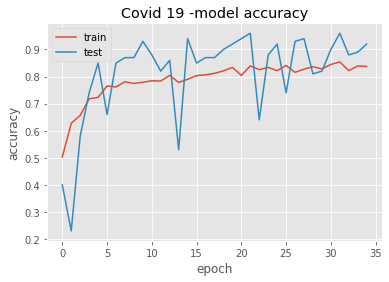

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Covid 19 -model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

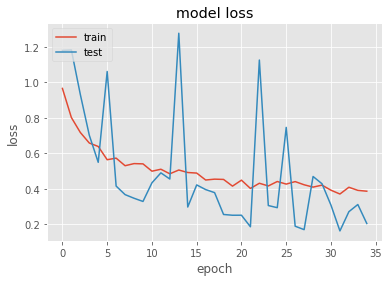

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


Instructions for updating:
Please use Model.predict, which supports generators.


In [81]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int64)

In [83]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [82]:
validation_generator.class_indices.keys()

dict_keys(['Val_covid', 'val_NoCovid', 'val_pneumonia'])

In [79]:
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics
#2.Get ground-truth classes and class-labels

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 

#3. Use scikit-learn to get statistics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

               precision    recall  f1-score   support

    Val_covid       0.98      0.95      0.97        60
  val_NoCovid       0.80      0.92      0.85        60
val_pneumonia       0.91      0.80      0.85        60

     accuracy                           0.89       180
    macro avg       0.90      0.89      0.89       180
 weighted avg       0.90      0.89      0.89       180



#### Loading the saved model to use in prediction

In [2]:
from tensorflow.keras.models import load_model

# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
saved_model = load_model('Covid_modelFinal.h5')

[INFO] saving COVID-19 detector model...


## TESTING THE DEPLOYED MODEL

In [3]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image

Lets take different images from different folders and see if our model can predict correctly

#### PNEUMONIA IMAGE

In [4]:
pneuimgloc = 'C:/Users/USER/Documents/MASTERS IN DATA ANALYTICS/machine learning/PANASHE/Assignment/X-Ray Image dataset/dataset/Train_Dataset/Pneumonia/00000499_008.png'

#### COVID IMAGE

In [5]:
covidImgloc='C:/Users/USER/Documents/MASTERS IN DATA ANALYTICS/machine learning/PANASHE/Assignment/X-Ray Image dataset/dataset/Train_Dataset/Covid-19/446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg'

#### LOADING PNEUMONIA IMAGE TO SEE PREDICTION ON THE MODEL

In [10]:
normImgloc='C:/Users/USER/Documents/MASTERS IN DATA ANALYTICS/machine learning/PANASHE/Assignment/X-Ray Image dataset/dataset/Train_Dataset/No_Covid-19/00001371_002.png'

[INFO] evaluating network...
Pneumonia


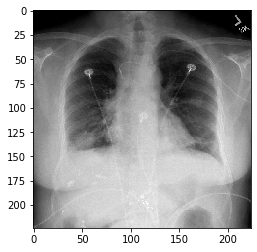

In [9]:
img = image.load_img(pneuimgloc,target_size=(224,224))
#img = image.load_img(covidImgloc,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# make predictions on the testing set
print("[INFO] evaluating network...")
output = saved_model.predict(img)
output=np.argmax(output,axis=1)
if output ==0:
    print("Covid-19")
elif output ==1:
    print('No-Covid')
elif output ==2:
    print('Pneumonia')
else:
    print ('Unknown')


#### LOADING COVID- 19 X-Ray IMAGE 

[INFO] evaluating network...
Covid-19


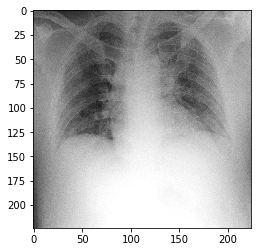

In [8]:
img = image.load_img(covidImgloc,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# make predictions on the testing set
print("[INFO] evaluating network...")
output = saved_model.predict(img)
output=np.argmax(output,axis=1)
if output ==0:
    print("Covid-19")
elif output ==1:
    print('No-Covid')
elif output ==2:
    print('Pneumonia')
else:
    print ('Unknown')


[INFO] evaluating network...
Pneumonia


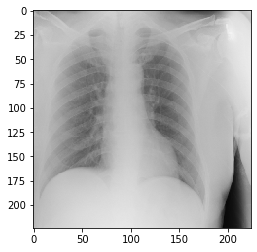

In [11]:
img = image.load_img(normImgloc,target_size=(224,224))
#img = image.load_img(covidImgloc,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# make predictions on the testing set
print("[INFO] evaluating network...")
output = saved_model.predict(img)
output=np.argmax(output,axis=1)
if output ==0:
    print("Covid-19")
elif output ==1:
    print('No-Covid')
elif output ==2:
    print('Pneumonia')
else:
    print ('Unknown')